In [1]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
from sklearn.linear_model import LinearRegression




In [2]:
# extract data
def extract_data() :
    X = []
    Y = []
    
    data_file = open("housing.csv")
    data_reader = csv.reader(data_file)
    
    row_count = 0
    for row in data_reader :
        row_count += 1
        if(row_count != 1) :
            Y.append(float(row[1])) # price
            data_row = [float(1)]
            for i in range(2, len(row)) :
                if(row[i] == "yes" or row[i] == "no") :
                    if(row[i] == "yes") :
                        data_row.append(float(1))
                    else :
                        data_row.append(float(0))
                else :
                    data_row.append(float(row[i]))
            X.append(data_row)
    
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y


In [3]:

# linear regression regularized functions
# cost function linear regression regularized
def cost_function_LR_reg(X, Y, theta, reg_lambda) :
    sample_count = float(X.shape[0])
    reg_sum = (reg_lambda / (float(2) * sample_count)) * np.sum(np.square(theta[1:]))
    return (float(1) / (float(2) * sample_count)) * float(np.dot(np.transpose(np.dot(X, theta) - Y) , np.dot(X, theta) - Y)) + reg_sum

# gradient descent linear regression regularized
def gradient_descent_LR_reg(X, Y, theta, alpha, threshold, reg_lambda) :
    costs = [cost_function_LR_reg(X, Y, theta, reg_lambda)]
    iterations = [1]
    sample_count = float(X.shape[0])
    iteration_count = 2
    
    while(True):
        reg_term = (reg_lambda / sample_count) * theta
        reg_term[0] = 0
        theta = theta - ((alpha / sample_count) * np.dot(np.transpose(X), np.dot(X, theta) - Y) + reg_term)
        
        current_cost = cost_function_LR_reg(X, Y, theta, reg_lambda)
        prev_cost = costs[iteration_count - 2]
        costs.append(current_cost)
        iterations.append(iteration_count)
        
        if(prev_cost - current_cost <= threshold) :
            break
            
        iteration_count = iteration_count + 1
    
    display_graph(costs, iterations)    # display graph 
    return theta

# initialize theta
def init_theta_LR_reg(X) :
    return np.zeros(X.shape[1])
    
# normal equation 
def normal_equation_reg(X, Y, reg_lambda) :
    reg_term = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, X.shape[1]) :
        reg_term[i][i] = reg_lambda
    
    return np.dot(np.linalg.inv(np.dot(np.transpose(X), X) + reg_term), np.dot(np.transpose(X), Y))


In [4]:
# locally weighted regression functions
# get local weights
def get_weights(X, input_var, LWRBand) :
    sample_count = (X.shape[0])
    weights = np.zeros((sample_count, sample_count))
    for i in range(sample_count) :
        weights[i][i] = np.exp((float(-1/2) * np.dot(np.transpose(X[i] - input_var), (X[i] - input_var))) / (LWRBand * LWRBand))
    return weights

# LWR cost
def LWRCost(X, Y, theta, W, reg_lambda):
    sample_count = float(X.shape[0])
    reg_sum = (reg_lambda / (float(2) * sample_count)) * np.sum(np.square(theta[1:]))
    return np.dot(np.dot(np.transpose(np.dot(X, theta) - Y), W), (np.dot(X, theta) - Y)) + reg_sum
# initialize theta
def init_theta_LWR(X) :
    return np.zeros(X.shape[1])

# gradient descent
def LWRGD(X, Y, theta, alpha, W, threshold, reg_lambda) :
    costs = [LWRCost(X, Y, theta, W, reg_lambda)]
    iterations = [1]
    sample_count = float(X.shape[0])
    iteration_count = 2
    
    while(True):
        reg_term = (reg_lambda) * theta
        reg_term[0] = 0
        sample_count = X.shape[0]
        theta = theta - (alpha / sample_count) * (np.dot(np.dot(np.transpose(X), W), np.dot(X, theta) - Y) + reg_term)
        
        current_cost = LWRCost(X, Y, theta, W, reg_lambda)
        prev_cost = costs[iteration_count - 2]
        if(iteration_count % 100 == 0) :
            print(iteration_count, prev_cost, current_cost, prev_cost - current_cost)
        costs.append(current_cost)
        iterations.append(iteration_count)
        
        if(prev_cost - current_cost <= threshold) :
            break
            
        iteration_count = iteration_count + 1
    
    print("Total iterations: ", iteration_count)
    display_graph(costs, iterations)    # display graph 
    return theta

# display graph
def display_graph(costs, iterations) :
    plt.plot(iterations, costs)

# normal equation
def LWR_Normal(X, W, Y) :
    reg_term = np.zeros((X.shape[1], X.shape[1]))
    for i in range(1, X.shape[1]) :
        reg_term[i][i] = reg_lambda
    val1 = np.linalg.inv(np.dot(np.dot(np.transpose(X), W), X) + reg_term)
    val2 = np.dot(np.dot(np.transpose(X), W), Y)
    
    return np.dot(val1, val2)


In [5]:
# initialize global variables
X, Y = extract_data()
alpha = 10000000000
threshold = 10 ** (-40)
theta = init_theta_LWR(X)
reg_lambda = 10 ** (-22)
LWRBand = float(20 / 546)

input_var = [1, 4000,2 ,1 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0]

In [6]:
mean_col = np.mean(X, axis=0)
std_col = np.std(X, axis=0)
for i in range(1, X.shape[1]) :
    for j in range(X.shape[0]) :
        X[j][i] = X[j][i] - mean_col[i]
        X[j][i] = X[j][i] / std_col[i]
            
# apply this for input as well
for i in range(1, X.shape[1]): 
    input_var[i] = input_var[i] - mean_col[i]
    input_var[i] = input_var[i] / std_col[i]

Total iterations:  54
Final cost:  9.060006210999761e-18
Final theta:  [ 3101.57188523 -2362.88555452 -4063.51498634 -1766.32905256
 -2888.0508516   1256.72655661  6672.96972752 -2275.01549192
  -679.41165693 -2112.27513615 -2495.29173226 -1716.32170698]
Predicted value :  34454.59427890817


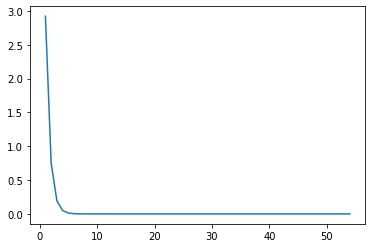

In [7]:
# locally weighted regression functions

W = get_weights(X, input_var, LWRBand)
LWRTheta = LWRGD(X, Y, theta, alpha, W, threshold, reg_lambda)
print("Final cost: ", LWRCost(X, Y, LWRTheta, W, reg_lambda))
print("Final theta: ", LWRTheta)

print("Predicted value : ", np.dot(np.transpose(input_var), LWRTheta))

In [8]:

# for normal equation
LWRTheta_Normal = LWR_Normal(X, W, Y)
print("Final cost: ", LWRCost(X, Y, LWRTheta_Normal, W, reg_lambda))
print("Final theta: ", LWRTheta_Normal)

print("Predicted value : ", np.dot(np.transpose(input_var), LWRTheta_Normal))

Final cost:  0.0014490362489622119
Final theta:  [ 3.379200e+04 -3.303125e+02 -1.280000e+02 -2.560000e+02  4.725000e+01
 -1.665000e+02  0.000000e+00  0.000000e+00 -1.275000e+01 -1.100000e+01
  0.000000e+00  6.400000e+01]
Predicted value :  34144.29688021046
